# 遥感模型：计算NDVI指数


NDVI指数可以反应某个区域的植被覆盖情况。指数的计算需要用到红波段和近红外波段的数据。

下面我们将用Landsat-8卫星的红色波段（Red）和近红外波段（NIR）来计算NDVI。数据已经做过正射校正，地图投影，和辐射校正。

波段

* 红色波段：波段4
* 近红外波段：波段5

我们使用的数据中，每一个波段都是一个单独的TIFF文件

In [2]:
from osgeo import gdal

In [7]:
from osgeo import gdal_array
import  math
import os
import rasterio
from matplotlib import pyplot as plt

定义影像所在路径，以及相关参数

In [8]:
#路径
tpath='/gdata'
 
# Use the same example image:
date = '2017-06-16'
url =   '/gdata/'
redband = 'LC08_L1TP_117031_20150305_20170412_01_T1_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_117031_20150305_20170412_01_T1_B{}.TIF'.format(5)

查看红外波段信息:

Decimation factor= 4


Text(0, 0.5, 'Row #')

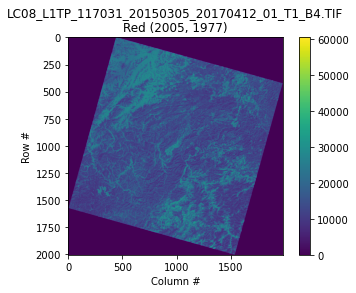

In [9]:
with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1] # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(red)
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

查看近红外波段信息：

Text(0, 0.5, 'Row #')

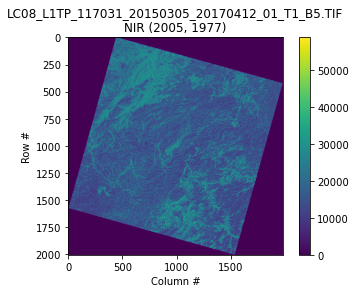

In [13]:
with rasterio.open(url+nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1] # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
 
plt.imshow(nir)
plt.colorbar()
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

定义计算 NDVI的函数，并进行计算：

In [15]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi
 
ndvi = calc_ndvi(nir,red)

/tmp/ipykernel_53/2419957734.py:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir - red) / (nir + red)


查看结果：

Text(0, 0.5, 'Row #')

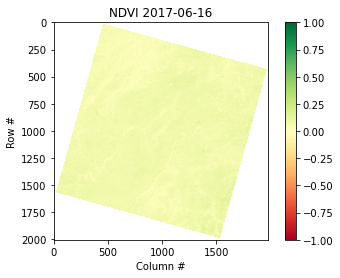

In [16]:
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')